In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
beeFile1 = pd.read_csv('./data/vHoneyNeonic_v02.csv')
beeFile2 = pd.read_csv('./data/vHoneyNeonic_v03.csv')

In [4]:
beeFile1.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year', 'StateName', 'Region', 'nCLOTHIANIDIN',
       'nIMIDACLOPRID', 'nTHIAMETHOXAM', 'nACETAMIPRID', 'nTHIACLOPRID',
       'nAllNeonic'],
      dtype='object')

In [5]:
beeFile2.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year', 'StateName', 'Region', 'FIPS', 'nCLOTHIANIDIN',
       'nIMIDACLOPRID', 'nTHIAMETHOXAM', 'nACETAMIPRID', 'nTHIACLOPRID',
       'nAllNeonic'],
      dtype='object')

In [6]:
beeFile2.drop('FIPS',axis=1,inplace=True)

In [7]:
beeFile2.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year', 'StateName', 'Region', 'nCLOTHIANIDIN',
       'nIMIDACLOPRID', 'nTHIAMETHOXAM', 'nACETAMIPRID', 'nTHIACLOPRID',
       'nAllNeonic'],
      dtype='object')

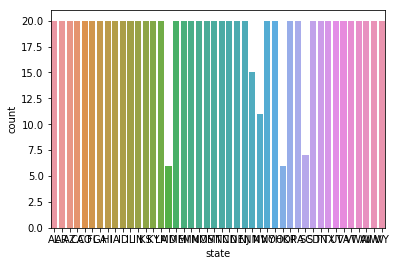

In [8]:
sns.countplot(data=beeFile1,x='state')

In [9]:
beeData = pd.concat([beeFile2,beeFile1])

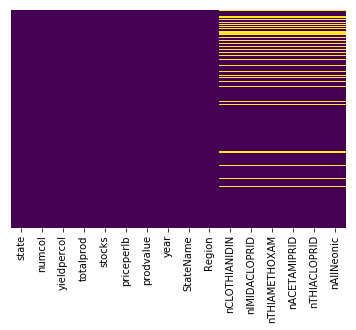

In [10]:
sns.heatmap(beeData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
beeData.dropna(inplace=True) # hago drop porque si es null, todas las

In [12]:
beeData.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,0.0,716.5,0.0,0.0,0.0,716.5
7,AL,11000.0,56,616000.0,209000.0,1.49,918000.0,2007,Alabama,South,7696.2,3258.1,4149.6,0.0,0.0,15103.9
8,AL,11000.0,72,792000.0,230000.0,1.21,958000.0,2006,Alabama,South,680.0,4230.2,5371.6,0.0,0.0,10281.8


### Visualización de datos

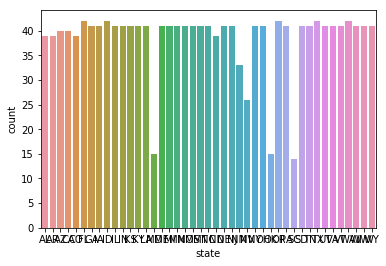

In [13]:
sns.countplot(x='state',data=beeData)

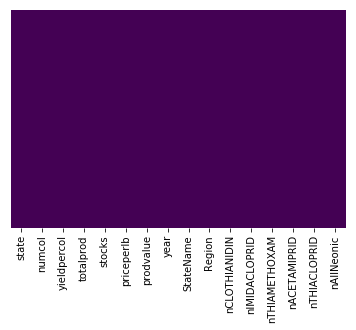

In [14]:
sns.heatmap(beeData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#sns.pairplot(beeData)

In [16]:
beeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 824
Data columns (total 16 columns):
state            1656 non-null object
numcol           1656 non-null float64
yieldpercol      1656 non-null int64
totalprod        1656 non-null float64
stocks           1656 non-null float64
priceperlb       1656 non-null float64
prodvalue        1656 non-null float64
year             1656 non-null int64
StateName        1656 non-null object
Region           1656 non-null object
nCLOTHIANIDIN    1656 non-null float64
nIMIDACLOPRID    1656 non-null float64
nTHIAMETHOXAM    1656 non-null float64
nACETAMIPRID     1656 non-null float64
nTHIACLOPRID     1656 non-null float64
nAllNeonic       1656 non-null float64
dtypes: float64(11), int64(2), object(3)
memory usage: 259.9+ KB


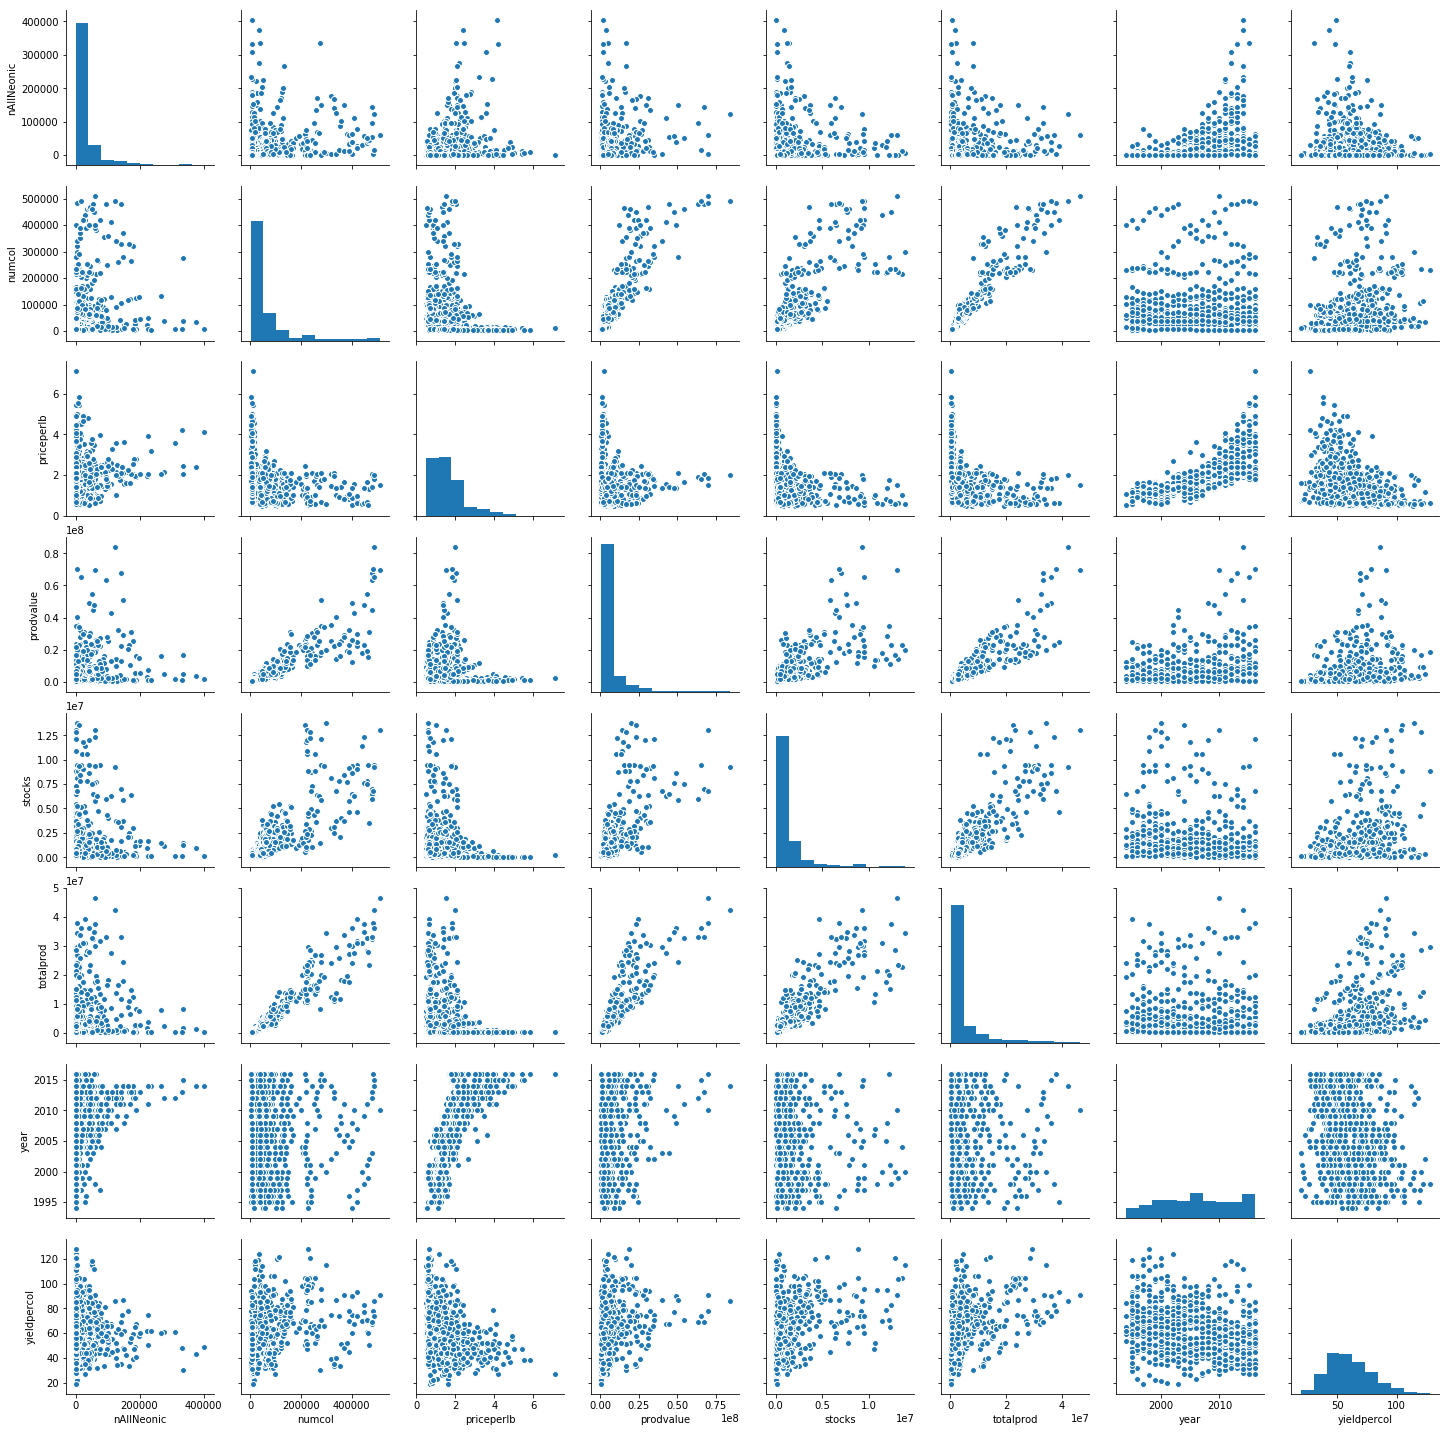

In [17]:
sns.pairplot(beeData[['nAllNeonic', 'numcol', 'priceperlb','prodvalue','state','stocks','totalprod','year','yieldpercol']])

In [18]:
corr = beeData.corr()


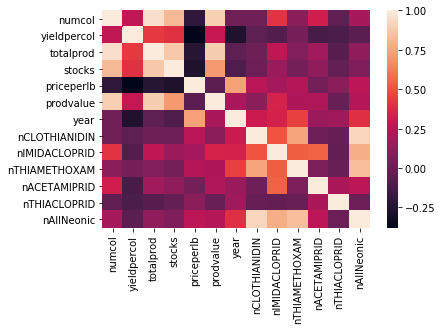

In [19]:
sns.heatmap(corr)

In [20]:
beeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 824
Data columns (total 16 columns):
state            1656 non-null object
numcol           1656 non-null float64
yieldpercol      1656 non-null int64
totalprod        1656 non-null float64
stocks           1656 non-null float64
priceperlb       1656 non-null float64
prodvalue        1656 non-null float64
year             1656 non-null int64
StateName        1656 non-null object
Region           1656 non-null object
nCLOTHIANIDIN    1656 non-null float64
nIMIDACLOPRID    1656 non-null float64
nTHIAMETHOXAM    1656 non-null float64
nACETAMIPRID     1656 non-null float64
nTHIACLOPRID     1656 non-null float64
nAllNeonic       1656 non-null float64
dtypes: float64(11), int64(2), object(3)
memory usage: 259.9+ KB


In [21]:
state = pd.get_dummies(beeData['state'],drop_first=True) # drop_first sirve para que no ponga dos columnas!
region = pd.get_dummies(beeData['Region'],drop_first=True)


In [22]:
cleanedData = beeData.drop(['state','year','StateName','Region'],axis=1,inplace=False)

In [23]:
train = pd.concat([cleanedData,state,region],axis=1)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 824
Data columns (total 57 columns):
numcol           1656 non-null float64
yieldpercol      1656 non-null int64
totalprod        1656 non-null float64
stocks           1656 non-null float64
priceperlb       1656 non-null float64
prodvalue        1656 non-null float64
nCLOTHIANIDIN    1656 non-null float64
nIMIDACLOPRID    1656 non-null float64
nTHIAMETHOXAM    1656 non-null float64
nACETAMIPRID     1656 non-null float64
nTHIACLOPRID     1656 non-null float64
nAllNeonic       1656 non-null float64
AR               1656 non-null uint8
AZ               1656 non-null uint8
CA               1656 non-null uint8
CO               1656 non-null uint8
FL               1656 non-null uint8
GA               1656 non-null uint8
IA               1656 non-null uint8
ID               1656 non-null uint8
IL               1656 non-null uint8
IN               1656 non-null uint8
KS               1656 non-null uint8
KY               1656

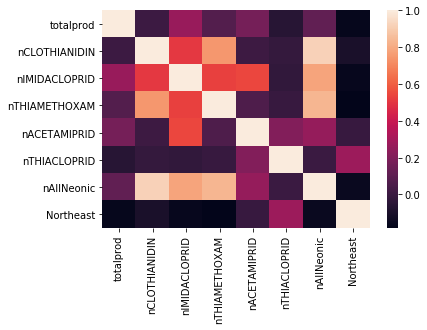

In [25]:
corr1 = train[['totalprod','nCLOTHIANIDIN','nIMIDACLOPRID','nTHIAMETHOXAM','nACETAMIPRID','nTHIACLOPRID','nAllNeonic','Northeast']].corr()
sns.heatmap(corr1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train.head()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,...,UT,VA,VT,WA,WI,WV,WY,Northeast,South,West
0,14000.0,66,924000.0,92000.0,0.81,748000.0,0.0,6704.8,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,15000.0,64,960000.0,96000.0,0.87,835000.0,0.0,371.6,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,16000.0,58,928000.0,28000.0,0.69,640000.0,0.0,716.5,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
7,11000.0,56,616000.0,209000.0,1.49,918000.0,7696.2,3258.1,4149.6,0.0,...,0,0,0,0,0,0,0,0,1,0
8,11000.0,72,792000.0,230000.0,1.21,958000.0,680.0,4230.2,5371.6,0.0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['totalprod','nAllNeonic'],axis=1), 
                                                    train['totalprod'], test_size=0.30, 
                                                    random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# print the intercept
print(lm.intercept_)

-3576264.7244480075


In [33]:
### Predicción de datos

In [34]:
predictions = lm.predict(X_test)

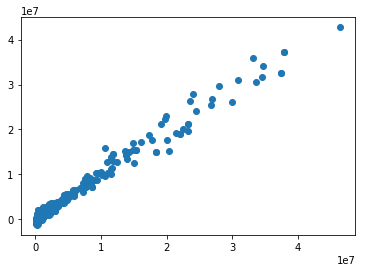

In [35]:
plt.scatter(y_test,predictions)

/home/alexhuang05/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


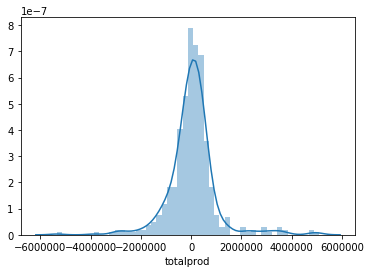

In [36]:
sns.distplot((y_test-predictions),bins=50);

In [37]:
from sklearn import metrics

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 591024.5404686688
MSE: 932515508150.0812
RMSE: 965668.425573748


## Redes neuronales

In [44]:
beeData.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,0.0,716.5,0.0,0.0,0.0,716.5
7,AL,11000.0,56,616000.0,209000.0,1.49,918000.0,2007,Alabama,South,7696.2,3258.1,4149.6,0.0,0.0,15103.9
8,AL,11000.0,72,792000.0,230000.0,1.21,958000.0,2006,Alabama,South,680.0,4230.2,5371.6,0.0,0.0,10281.8


In [46]:
X_train, X_test, y_train, y_test = train_test_split(beeData.drop(['state'],axis=1), 
                                                    beeData['state'], test_size=0.30, 
                                                    random_state=101)

In [47]:
import tensorflow as tf
import tensorflow.contrib.learn.python.learn as learn

In [53]:
beeData.groupby(by='state').count().count()

numcol           43
yieldpercol      43
totalprod        43
stocks           43
priceperlb       43
prodvalue        43
year             43
StateName        43
Region           43
nCLOTHIANIDIN    43
nIMIDACLOPRID    43
nTHIAMETHOXAM    43
nACETAMIPRID     43
nTHIACLOPRID     43
nAllNeonic       43
dtype: int64

In [56]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=1)];
classifier = learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[10], n_classes=43);
# hidden_units: son las capas con las neuronas que tiene cada capa: [30,30,30] significa 3 capas de 30 neuronas cada una
classifier.fit(X_train, y_train, steps=400, batch_size=20);


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_is_chief': True, '_task_type': None, '_evaluation_master': '', 'save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1433ba1828>, '_task_id': 0, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_num_ps_replicas': 0, 'keep_checkpoint_every_n_hours': 10000, 'tf_random_seed': None, 'save_checkpoints_steps': None, 'save_checkpoints_secs': 600, '_environment': 'local', 'keep_checkpoint_max': 5}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and bat

ValueError: Data types for extracting pandas data must be int, float, or bool. Found: 'StateName' type='object', 'Region' type='object'